# Simple linear regression 

## Import the data

[pandas](https://pandas.pydata.org/) provides excellent data reading and querying module,[dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), which allows you to import structured data and perform SQL-like queries. 

Here we imported some house price records from [Trulia](https://www.trulia.com/?cid=sem|google|tbw_br_nat_x_x_nat!53f9be4f|Trulia-Exact_352364665_22475209465_aud-278383240986:kwd-1967776155_260498918114_). For more about extracting data from Trulia, please check [my previous tutorial](https://www.youtube.com/watch?v=qB418v3k2vk).

In [1]:
import pandas
df = pandas.read_excel('house_price.xlsx')
df[:10]

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views
0,993,229900,3,2,single-family home,10018,2002,1541,77,1357
1,994,149900,4,2,single-family home,8712,1975,1810,5,1282
2,995,229900,3,2,single-family home,13504,1988,1456,76,947
3,996,359000,5,4,single-family home,10130,1997,2903,79,951
4,999,394000,3,2,single-family home,18295,2001,2616,73,709
5,1000,349900,3,2,single-family home,204732,1967,3850,42,366
6,1002,148500,3,1,single-family home,9147,1959,1000,17,328
7,1003,134900,2,2,townhouse,2300,1994,920,56,328
8,1004,265000,3,3,single-family home,13939,1998,2705,12,362
9,1005,149900,4,3,townhouse,2291,1999,1440,4,137


## Prepare the data

We want to use the price as the dependent variable and the area as the independent variable, i.e., use the house areas to predict the house prices

In [2]:
X = df['area']
print (X[:10])
X_reshape = X.values.reshape(-1,1) # reshape the X to a 2D array
print (X_reshape[:10])
y = df['price']

0    1541
1    1810
2    1456
3    2903
4    2616
5    3850
6    1000
7     920
8    2705
9    1440
Name: area, dtype: int64
[[1541]
 [1810]
 [1456]
 [2903]
 [2616]
 [3850]
 [1000]
 [ 920]
 [2705]
 [1440]]


[sklearn](http://scikit-learn.org/stable/) provides a [split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function that can split the data into training data and testing data. 

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshape,y, test_size = 0.3) # put 30% data as the testing data

print ('number of training data:',len(X_train),len(y_train))
print ('number of testing data:',len(X_test),len(y_test))


number of training data: 28 28
number of testing data: 13 13


## Train the model

Use the [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to estimate parameters from the training data.

In [4]:
from sklearn import linear_model
slr = linear_model.LinearRegression() #create an linear regression model objective 

slr.fit(X_train,y_train) # estimate the patameters
print('beta',slr.coef_)
print('alpha',slr.intercept_)


beta [109.19155468]
alpha 66431.49464617681


## Evaluate the model

Let's calculate the [mean squared error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) and the [r square](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score) of the model based on the testing data.

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

y_predict = slr.predict(X_test) # predict the Y based on the model
mean_squared_error = mean_squared_error(y_test,y_predict) # calculate mean square error
r2_score = r2_score(y_test,y_predict) #calculate r square

print ('mean square error:',mean_squared_error )
print ('r square:',r2_score )


mean square error: 72285136244.71266
r square: -0.11600591123194648


## Visualize the model

We use the [matplotlib](https://matplotlib.org/) to visualize our data.

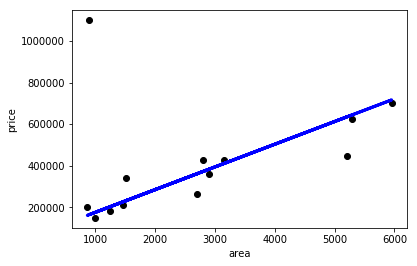

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_test, y_test,  color='black') # create a scatterplot to visualize the test data
plt.plot(X_test, y_predict, color='blue', linewidth=3) # add a line chart to visualize the model

plt.xlabel('area')
plt.ylabel('price')

plt.show()